# EDA  Taux de desabonement

## import requirements

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## read the dataset

In [121]:
data = pd.read_csv('BankChurners.csv')
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,0.00,1.00


## infos about dataset

In [122]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')



- CLIENTNUM - (Feature, dbl,continuous) Numéro de client
- Customer_Age - (Feature, int,continuous) Âge du client
- Gender - (Feature, chr, discrete) Sexe du client
- Dependent_count - (Feature, int, continuous) Nombre de personnes à charge d'un utilisateur. Autrement dit, combien de personnes dépendent de l'utilisateur de la carte de crédit pour leur soutien financier. Un nombre plus élevé indique que les dépenses peuvent être élevées.
- Education_Level - (Feature, char, discrete) Niveau d'éducation du client.
- Marital_Status - (Caractéristique, caractère, discret) Situation de famille du client.
- Income_Category - (Feature, char, discrete) Catégorie de revenu du client
(Variable démographique - Catégorie de revenu annuel du titulaire du compte (<40K$, 40K$ - 60K$, 60K$ - 80K$, 80K$ - 120K$, > 120K$, Inconnu))
- Card_Category - (Feature, char, discrete) Catégorie de carte du client ( (Blue, Silver, Gold, Platinum)) 
- Credit_Limit : Limite de crédit sur la carte de crédit
- Months_on_book : mois de présence des clients à la banque
- Total_Relationship_Count : nombre total de produits détenus par les clients (cartes, comptes, etc.)
- Months_Inactive_12_mon : mois d'inactivité des clients.
- Contacts_Count_12_mon : fréquence des contacts avec les clients au cours des 12 derniers mois.
- Total_Revolving_Bal : solde impayé de la carte.
- Avg_Open_To_Buy : possibilité d'ouvrir une nouvelle limite de crédit
- Total_Trans_Amt : total des transactions au cours des 12 derniers mois.
- Contacts_count_12_mont : Je suppose qu'il contient le nombre de fois où la banque a contacté le client et/ou vice-versa. Il ne semble pas y avoir de relation avec d'autres champs (par exemple, les clients contactés qui ont quitté la banque, les clients avec un solde renouvelable, etc). Je suppose que cela a un rapport avec les campagnes publicitaires.
- Total_Amt_Chng_Q4_Q1 : représente de combien le client a augmenté ses dépenses en comparant le 4ème trimestre par rapport au 1er.
- Total_Ct_Chng_Q4_Q1 : similaire au précédent mais en nombre de transactions.
- Avg_Utilization_Ratio:représente la part du crédit disponible que le client a dépensée.
---
    
- Attrition_Flag - (Prédicteur, discret, binaire) : Exit (le client quitte l'entreprise) ou Current (le client reste dans l'entreprise).



In [123]:
data.shape

(10127, 23)

In [124]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [125]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

## analyse univarie

In [126]:
col = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
data[col].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,"10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00"
mean,46.33,2.35,35.93,3.81,2.34,2.46,"8,631.95","1,162.81","7,469.14",0.76,"4,404.09",64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,"9,088.78",814.99,"9,090.69",0.22,"3,397.13",23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,"1,438.30",0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,"2,555.00",359.00,"1,324.50",0.63,"2,155.50",45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,"4,549.00","1,276.00","3,474.00",0.74,"3,899.00",67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,"11,067.50","1,784.00","9,859.00",0.86,"4,741.00",81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,"34,516.00","2,517.00","34,516.00",3.40,"18,484.00",139.00,3.71,1.00


### label attribute

In [127]:
data['Attrition_Flag'].describe()

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

### deleting attribute not used

In [128]:
df = data.iloc[: , :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00


### categorical attributes

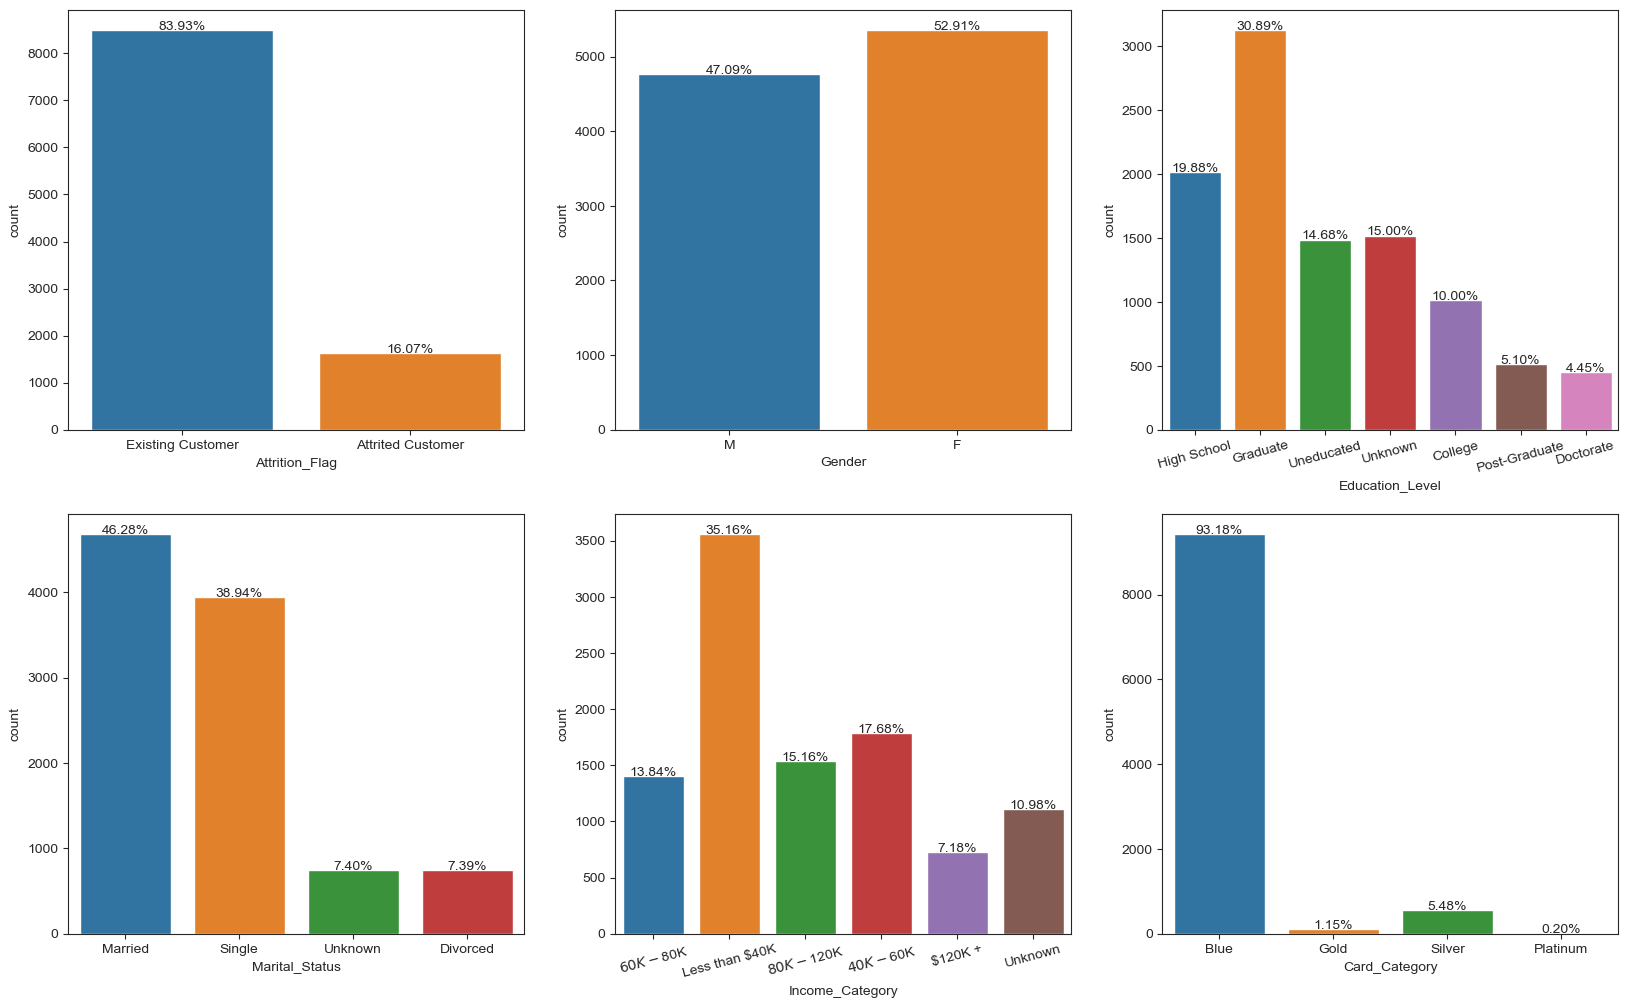

In [129]:
categoricals = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def plot(categ):
    fig, axis = plt.subplots(len(categ) // 3 , 3 , figsize=(20,12))
    idx = 0
    for i in range(len(categ) // 3):
        for j in range(3):
            
            axe = sns.countplot(x=categ[idx],data=df , ax=axis[i][j])
            if categ[idx] in ['Education_Level', 'Income_Category']:
                for item in axe.get_xticklabels():
                    item.set_rotation(15)
            for p in axe.patches:
                height = p.get_height()
                axe.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center") 
            idx += 1
            
plot(categoricals)

#### Observations:
- our data composition is not equal in Attrition_Flag: 83.93% Existing Customer
- Blue card is the most used: 93.18%
- for higher educated customer they use less their cards

### Label X Attributes

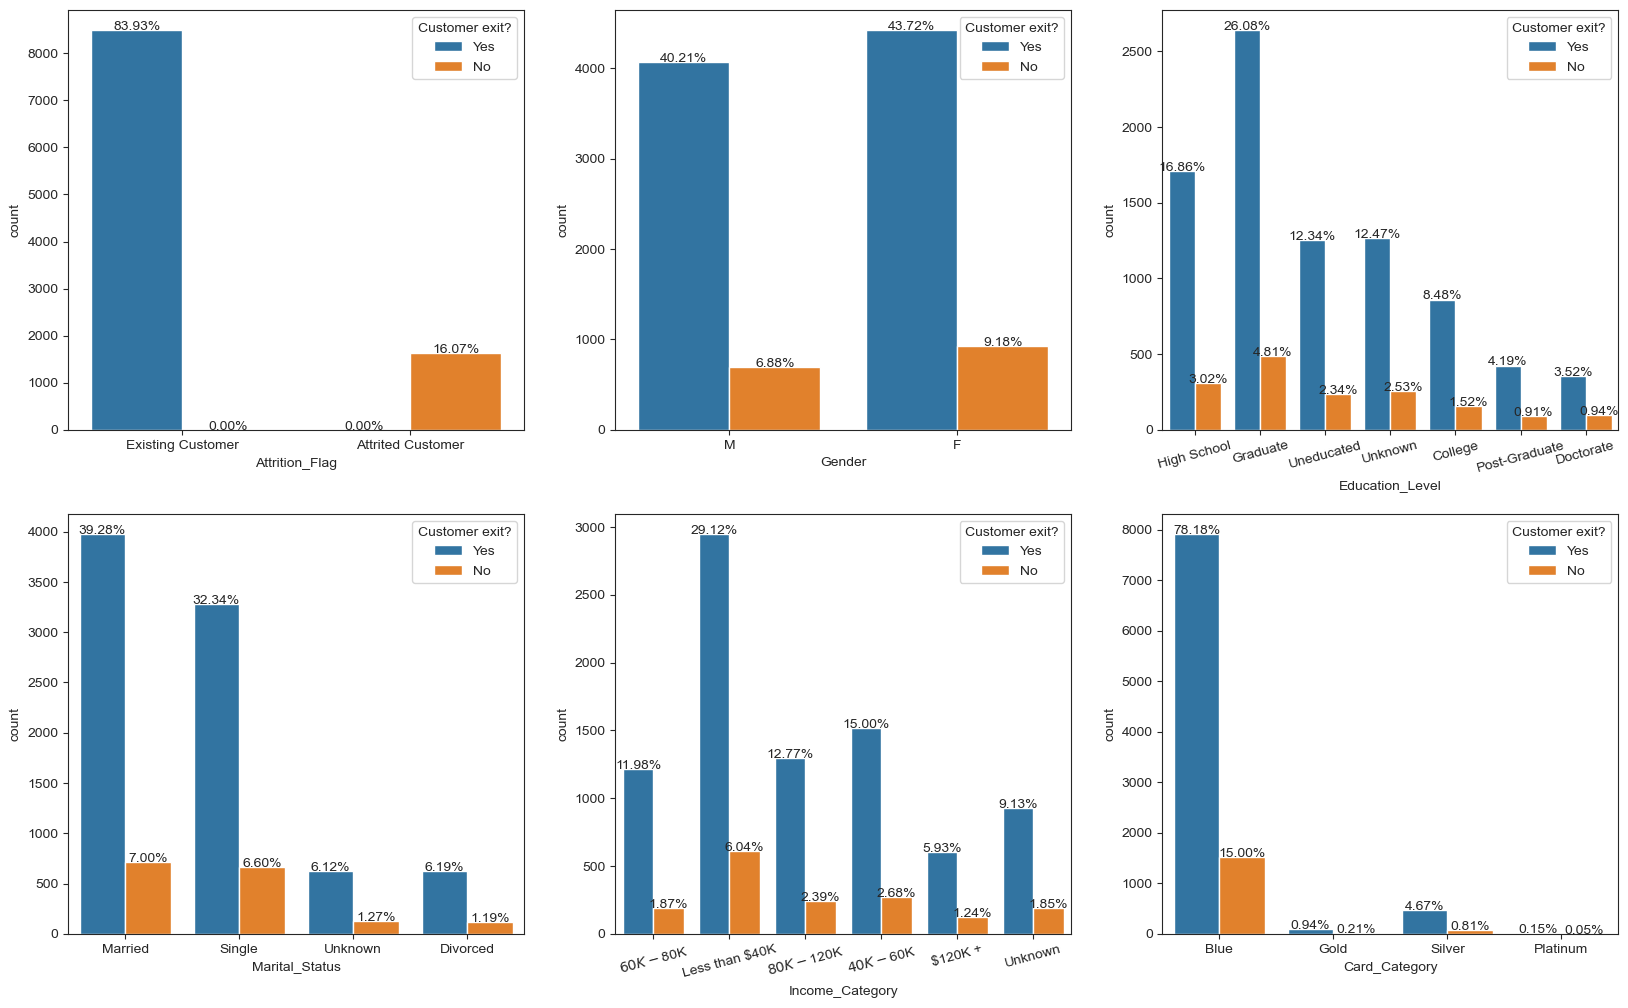

In [130]:
def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(x=cats[index], data=data, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center") 
            index += 1
            
pltCountplotHueTarget(categoricals, 'Attrition_Flag')

#### Observations:
- Gender doesn't affect Attrition
- Graduated customer are the mostly still existing
- 16% are not anymore customers
- marital status is splited between married and single

### numerical attribute

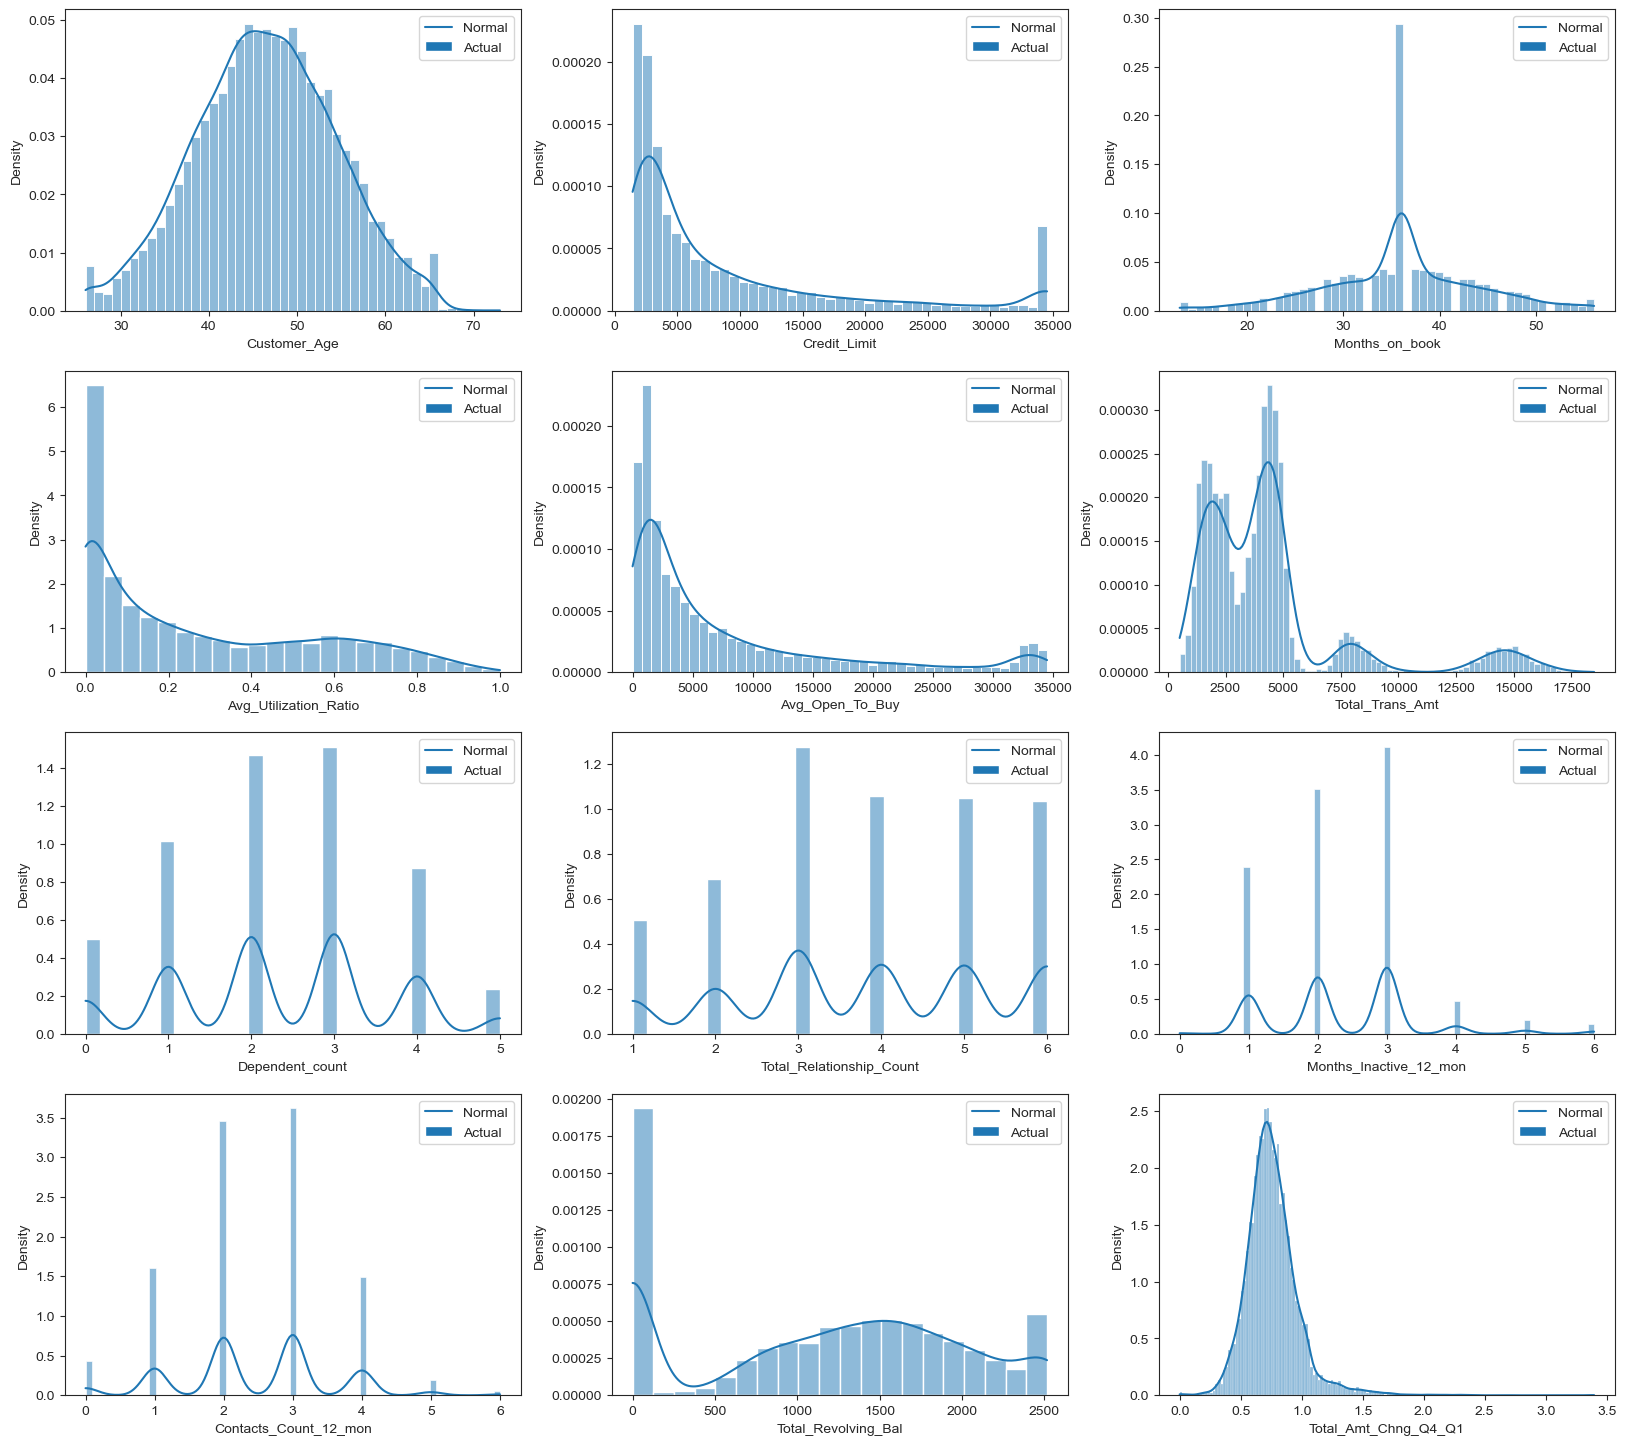

In [131]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy',
                   'Total_Trans_Amt','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon',
                   'Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

def plotNum(col):
    fig, axes = plt.subplots(len(col) // 3,3,figsize=(20,18))
    
    idx= 0
    for i in range(len(col) // 3):
        for j in range(3):
            sns.histplot(df.loc[:,col[idx]],  stat="density",kde=True,  ax=axes[i][j])
            axes[i][j].legend(labels=['Normal', 'Actual'])
            idx += 1
            
plotNum(numeric_columns)

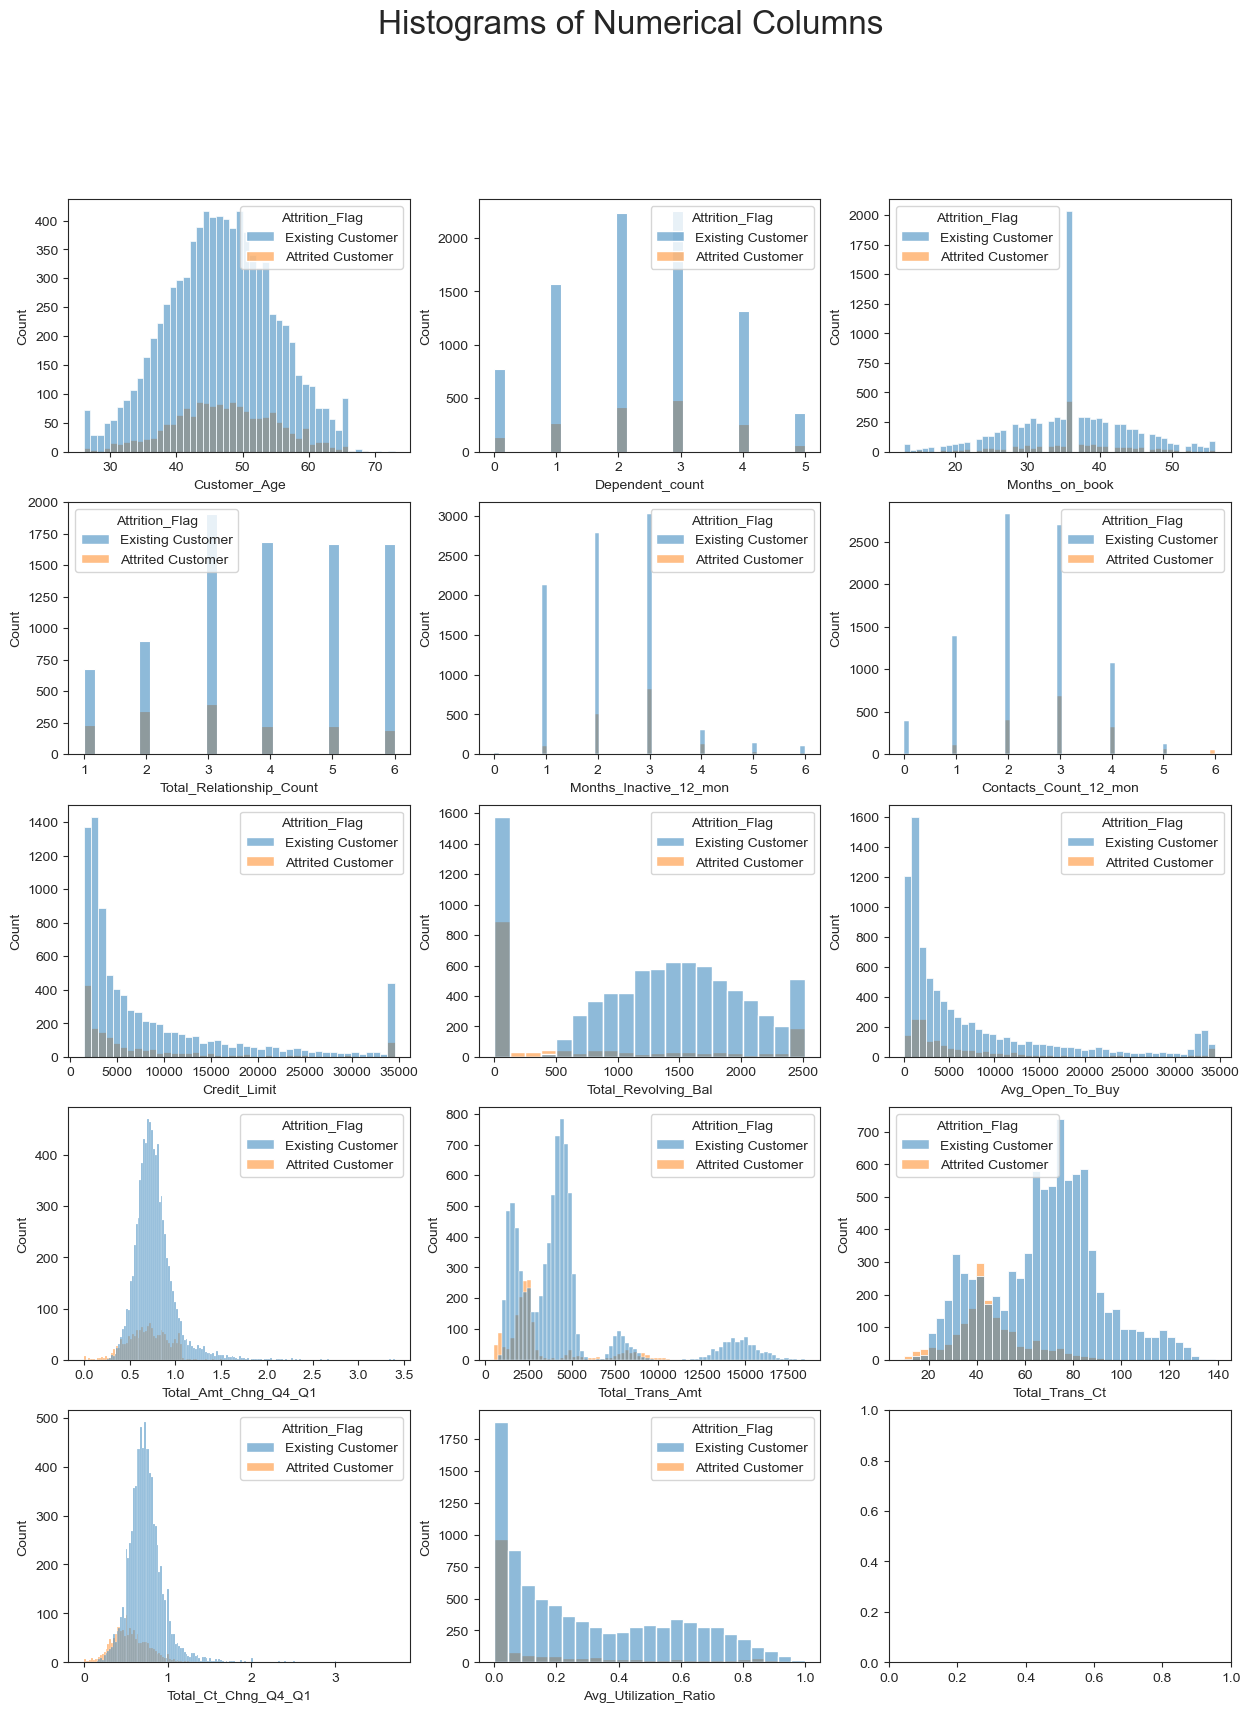

In [132]:
norow = int(round(len(col) / 3))

fig, ax = plt.subplots(norow, 3, figsize=(15, 19))

plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i, d in enumerate(col):
    row_index = i // 3  # Calculate the row index
    col_index = i % 3   # Calculate the column index
    chart = sns.histplot(x=df.loc[:, d], data=df, ax=ax[row_index, col_index], hue='Attrition_Flag')

plt.show()

- Attried customer with Total_Revolving_Bal Between 0 and 150 are hight
- all of customer with Total_Revolving_Bal Between 150 and 500 Attried
---
- Attried customer with Total_Trans_amt (between 0 and 500) and (between 2250 and 2600) and (between 9000 and 10500) are more than existing costomer
---
- Majority of customer who have Total_Trans_Ct (between 4 and 20) and ( between 40 and 45) are attrited customer

In [133]:
sep_col=['Customer_Age','Months_on_book','Total_Relationship_Count'
         ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy'
        ,'Dependent_count']

attr_cust= df[df['Attrition_Flag'] != 'Existing Customer' ]
exis_cust= df[df['Attrition_Flag'] == 'Existing Customer' ]
att = attr_cust[sep_col]
exis= exis_cust[sep_col] 

a = att.describe()
a =a.loc['mean',sep_col]


b = exis.describe()
b =b.loc['mean',sep_col]
        
frame = { 'Lost-Customers': a, 'Existing-Customers': b } 
  
result = pd.DataFrame(frame) 
pd.options.display.float_format = '{:,.2f}'.format
result

,Lost-Customers,Existing-Customers
Customer_Age,46.66,46.26
Months_on_book,36.18,35.88
Total_Relationship_Count,3.28,3.91
Months_Inactive_12_mon,2.69,2.27
Contacts_Count_12_mon,2.97,2.36
Credit_Limit,"8,136.04","8,726.88"
Avg_Open_To_Buy,"7,463.22","7,470.27"
Dependent_count,2.40,2.34


### remarques

- Mean of age for customer is the almost same 
- we notice the lost customer have a higher mean of month inactive

#### age analysis

Age mean :  46.32596030413745
Age median :  46.0


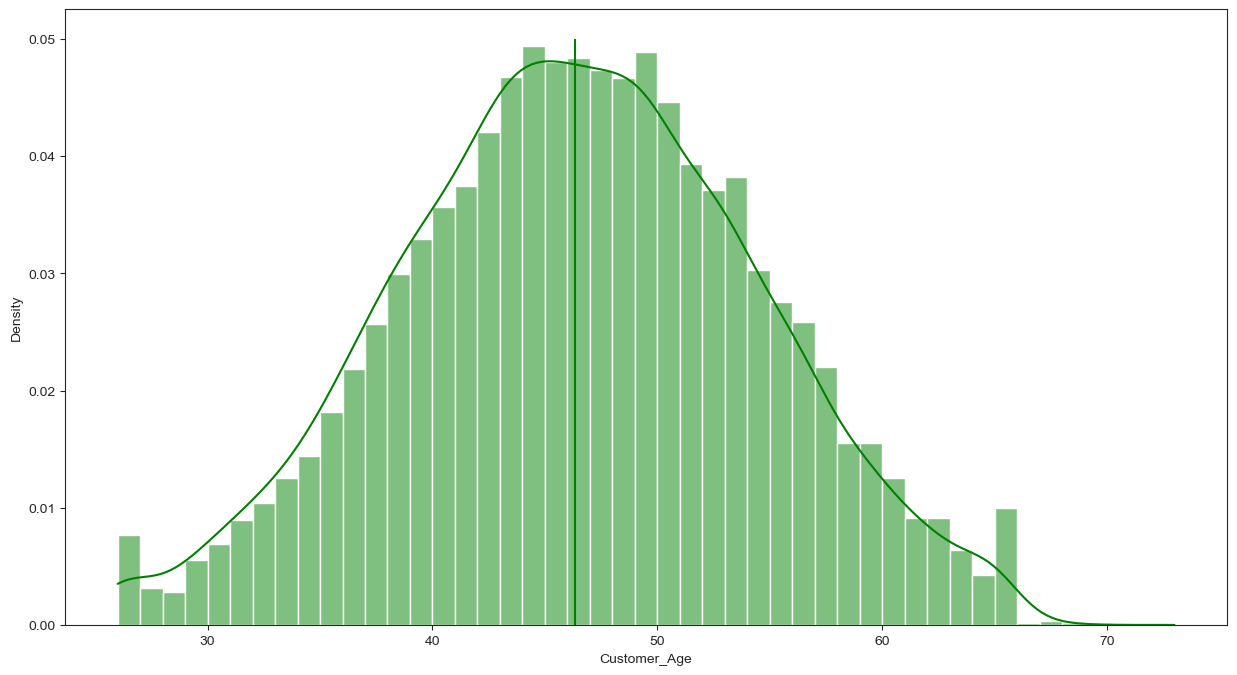

In [143]:
plt.figure(figsize=(15,8))
sns.histplot(df['Customer_Age'], color = 'green',stat="density",
                         kde=True,)
age_mean = df['Customer_Age'].mean()
plt.vlines(age_mean, 0, 0.05, color = 'green')
print('Age mean : ', age_mean)
print('Age median : ', df['Customer_Age'].median())

### Total transaction Analysis

In [144]:
df['Total_Trans_Amt_Categorized'] = pd.cut(df['Total_Trans_Amt'], bins=5)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Trans_Amt_Categorized
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,"(492.026, 4104.8]"
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,"(492.026, 4104.8]"
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,"(492.026, 4104.8]"
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,"(492.026, 4104.8]"
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,"(492.026, 4104.8]"


In [145]:
df.groupby('Card_Category')['Total_Trans_Amt_Categorized'].value_counts()

Card_Category  Total_Trans_Amt_Categorized
Blue           (492.026, 4104.8]              5285
               (4104.8, 7699.6]               3188
               (7699.6, 11294.4]               375
               (11294.4, 14889.2]              343
               (14889.2, 18484.0]              245
Gold           (4104.8, 7699.6]                 32
               (492.026, 4104.8]                30
               (7699.6, 11294.4]                26
               (14889.2, 18484.0]               14
               (11294.4, 14889.2]               14
Platinum       (7699.6, 11294.4]                 5
               (4104.8, 7699.6]                  4
               (11294.4, 14889.2]                4
               (492.026, 4104.8]                 4
               (14889.2, 18484.0]                3
Silver         (492.026, 4104.8]               260
               (4104.8, 7699.6]                 96
               (7699.6, 11294.4]                75
               (11294.4, 14889.2]      

- we know that the blue card have the highest number of customer 
- we notice that blue card have the highest number in all categories of transfert amounts 

<Axes: >

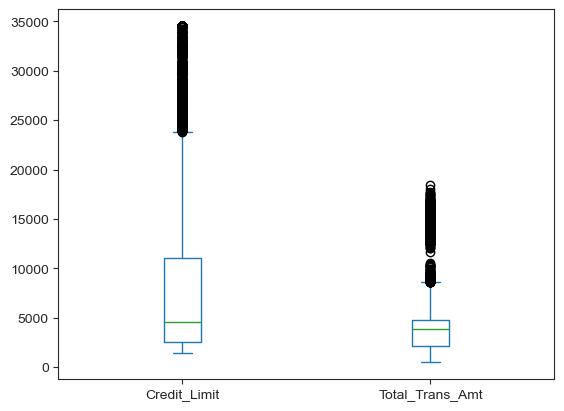

In [137]:
df[['Credit_Limit','Total_Trans_Amt']].plot.box()

+ the median of Credit_limit and Total_Trans_amt are in the box of each other: this means there's probably a correlation 

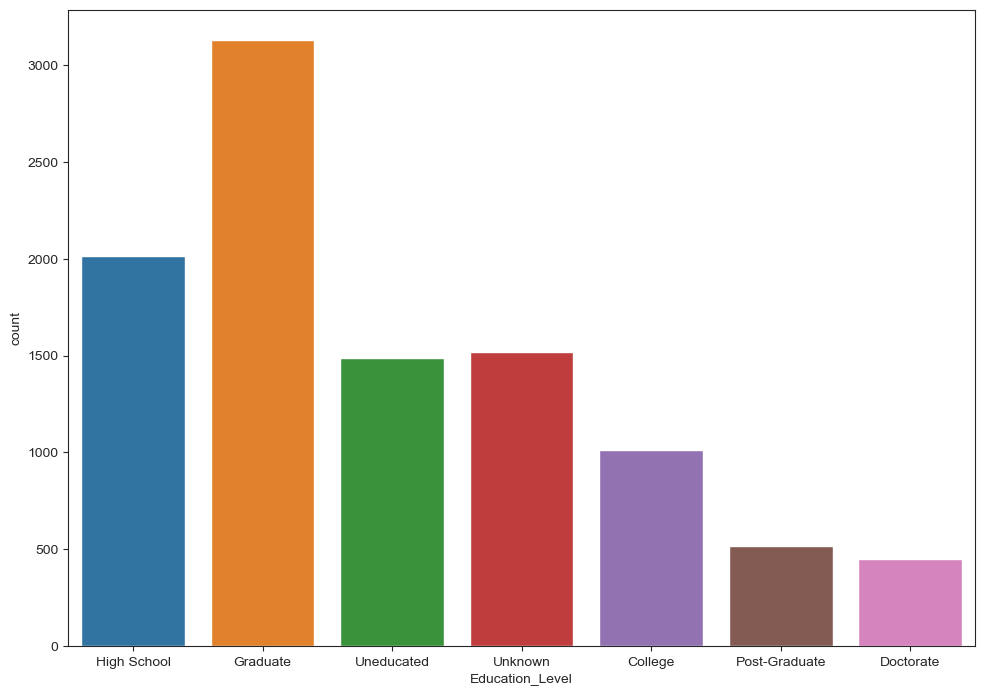

In [146]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(x="Education_Level" , data=df)

In [139]:
import plotly.express as px

# First pie chart
fig = px.pie(attr_cust, names='Education_Level', title='Proportion Of Education Levels for attrited customer')
fig.update_traces(hole=0.33)
fig.show()

# Second pie chart
fig = px.pie(exis_cust, names='Education_Level', title='Proportion Of Education Levels for existing customer')
fig.update_traces(hole=0.33)
fig.show()


- graduate,Doctorate and hight school existing customer are more 2% of attried
- college, uneducated are almostthe same percentage

In [140]:

import plotly.express as px
fig = px.sunburst(data, path=['Attrition_Flag', 'Gender', 'Card_Category'], values='Credit_Limit',title="Click Chart pour Examiner ... ")
fig.show()

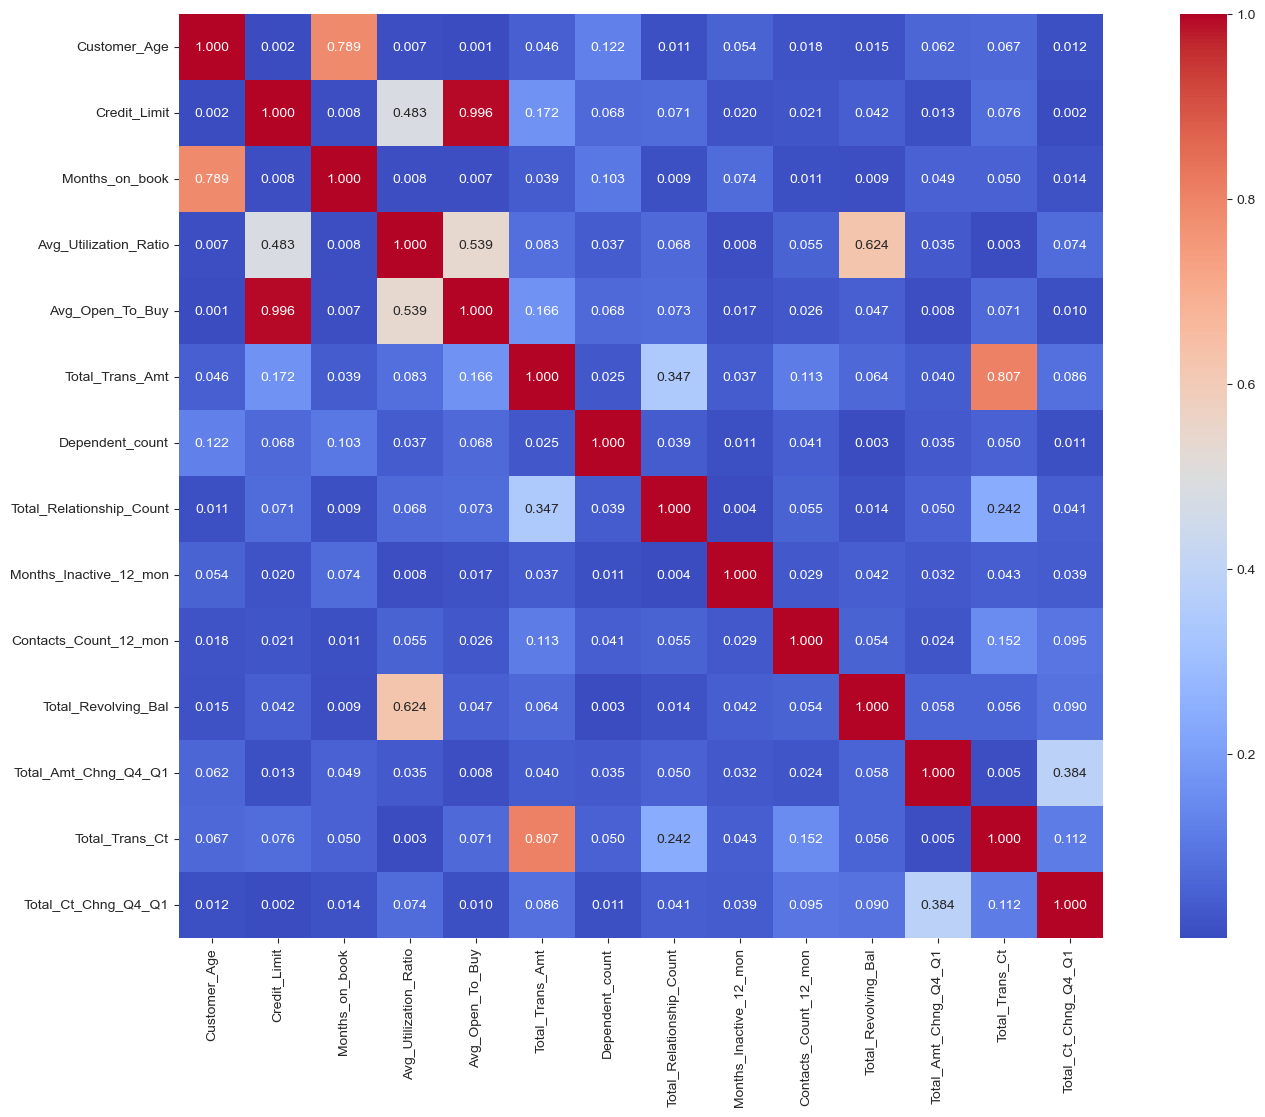

In [141]:
corr_data = df.loc[:, numeric_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

-  theres a low correclation between majority of attributes
- a slight correlation between customer_age and month_on_book
- a slight correlation between total_trans_amt and total_trans_ct
- a high correlation between open_to_buy and credit_limit